In [1]:
import tensorflow as tf
from tensorflow import keras

from collections import deque
import numpy as np
import matplotlib.pyplot as plt


episodes = 1000  # number of episodes to run
initialize = 300  # initial time steps before start updating

from chain_mdp import ChainMDP
from agent_lava import agent
from lava_grid import ZigZag6x10
# default setting
max_steps = 100
stochasticity = 0 # probability of the selected action failing and instead executing any of the remaining 3
# recieve 1 at rightmost stae and recieve small reward at leftmost state
env = ZigZag6x10(max_steps=max_steps, act_fail_prob=stochasticity, goal=(5, 9), numpy_state=False)
agent = agent(load_model=None)
s = env.reset()
rrecord = []
totalstep = 0
for ite in range(episodes):
    obs = env.reset()
    done = False
    rsum = 0
    while not done:
        totalstep +=1
        action = agent.action(obs)
        next_obs,reward,done,info = env.step(action)
        rsum += reward
        try :
            if obs == 0 :
                if totalstep>initialize:
                    agent.train(totalstep)
                obs = next_obs    

        except ValueError :
            pass
        experience = (obs,action,reward,next_obs,done)
        agent.buffer.append(experience)

        if totalstep>initialize:
            agent.train(totalstep)
        obs = next_obs
                        
################################################################################
    ## DO NOT CHANGE THIS PART!
    rrecord.append(rsum)
    if ite % 200 == 0:
        print('iteration {} ave reward {}'.format(ite, np.mean(rrecord[-10:])))
    
    ave100 = np.mean(rrecord[-100:])   
    if  ave100 > 17.5:
        print("Solved after %d episodes."%ite)
        break

2022-06-08 04:18:06.531501: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


initialize model
iteration 0 ave reward -1.06
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


2022-06-08 04:18:08.092372: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-06-08 04:18:08.093034: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-06-08 04:18:08.127530: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_COMPAT_NOT_SUPPORTED_ON_DEVICE: forward compatibility was attempted on non supported HW
2022-06-08 04:18:08.127570: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: iron
2022-06-08 04:18:08.127575: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: iron
2022-06-08 04:18:08.127677: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 510.73.5
2022-06-08 04:18:08.127694: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 510.47.3
2022-06-08 04:18:08.127700:

iteration 200 ave reward -1.0110000000000003
iteration 400 ave reward -1.0000000000000004
iteration 600 ave reward -1.0000000000000004
iteration 800 ave reward -1.0000000000000004


In [2]:
agent.save("./saved_models/lava/")

2022-06-08 04:27:55.517935: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ./saved_models/lava/Qprincipal/assets
INFO:tensorflow:Assets written to: ./saved_models/lava/Qtarget/assets


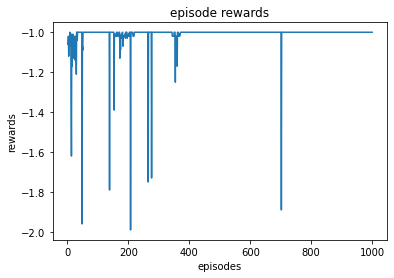

In [3]:
# plot [episode, reward] history
x = [i+1 for i in range(len(rrecord))]
plt.plot(x, rrecord)
plt.title('episode rewards')
plt.xlabel('episodes')
plt.ylabel('rewards')
plt.show()

In [4]:
import gym
from lava_grid import ZigZag6x10
from agent_lava import agent
import random

# default setting
max_steps = 100
stochasticity = 0 # probability of the selected action failing and instead executing any of the remaining 3
no_render = True

env = ZigZag6x10(max_steps=max_steps, act_fail_prob=stochasticity, goal=(5, 9), numpy_state=False)
s = env.reset()
done = False
cum_reward = 0.0

""" Your agent"""
agent = agent()

# moving costs -0.01, falling in lava -1, reaching goal +1
# final reward is number_of_steps / max_steps
while not done:
    action = agent.action(s)
    # action = random.randrange(4): random actions
    ns, reward, done, _ = env.step(action)
    cum_reward += reward
    s = ns
print(f"total reward: {cum_reward}")

load model :  ./saved_models/lava/
trying load ./saved_models/lava/Qprincipal
trying load ./saved_models/lava/Qtarget
total reward: -1.0000000000000007
